## Two dimensional systems and their vector fields
Jim Faran pointed out some unsatisfactory  features of the Fall 2019 version of fieldplot.

1. The numbers of arrows was badly chosen. Now fixed based on aspect ratio of plot.

2. The shape of the arrows is bad if either the aspect ratio of the plot is not close to 1 or if the ranges on the axes are not close to equal. 

The code below tests for good results in the cases of non-square plots and unequal axis ranges.

Jim's version, using "annotate" to draw arrows, is significantly slower than my version, and the arrows are not crisp.

My version gives the crisp arrows in the case of square plot and equal axis ranges, but the arrow shapes are incorrect
for either non-square plots and unequal axis ranges (or both).

In [1]:
from resources306 import *

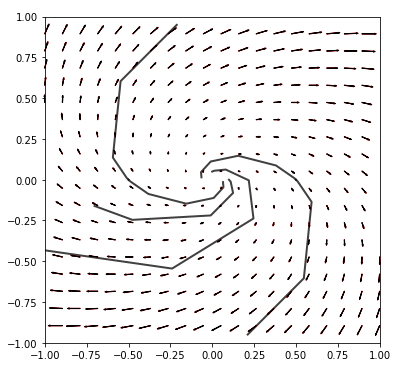

In [2]:
A = [[1,2],[-1,1]] 
plt.figure(figsize=(6,6))
fieldplotlinear(A, -1,1, -1,1, color='red', alpha=0.25)
phaseportraitlinear(A, [(0,.05),(.1,0,2),(-.5,0,-2,1),(.5,0,-2,1)], alpha=0.75, lw=2, color='k');
plt.savefig('additional_figures/Systems_of_ODEs__fieldplotlinear_phaseportraitlinear.svg',bbox_inches='tight')

In [3]:
def test(fpl,version):
    fig,axes = plt.subplots(2,2,figsize=(18,12),gridspec_kw={'height_ratios': [2, 1]})
    A0 = [[1,2],[-1,1]]
    
    # balanced coordinates
    rescale = 1
    P = np.array([[1,0],[0,1/rescale]])
    A = np.linalg.inv(P)@np.array(A0)@P
    plt.sca(axes[0,0])  # square plot
    fpl(A, -1,1, -rescale,rescale, color='red', alpha=0.5)
    plt.sca(axes[1,0])  # non-square plot
    fpl(A, -1,1, -rescale,rescale, color='red', alpha=0.5)

    # stretched coordinates
    rescale = 100
    P = np.array([[1,0],[0,1/rescale]])
    A = np.linalg.inv(P)@np.array(A0)@P
    plt.sca(axes[0,1])  # square plot
    fpl(A, -1,1, -rescale,rescale, color='red', alpha=0.5)
    plt.sca(axes[1,1])  # non-square plot
    fpl(A, -1,1, -rescale,rescale, color='red', alpha=0.5)   
    plt.suptitle(version + ' version')
    plt.savefig('fp_test_'+version+'.svg',bbox_inches='tight')

## Ringland version

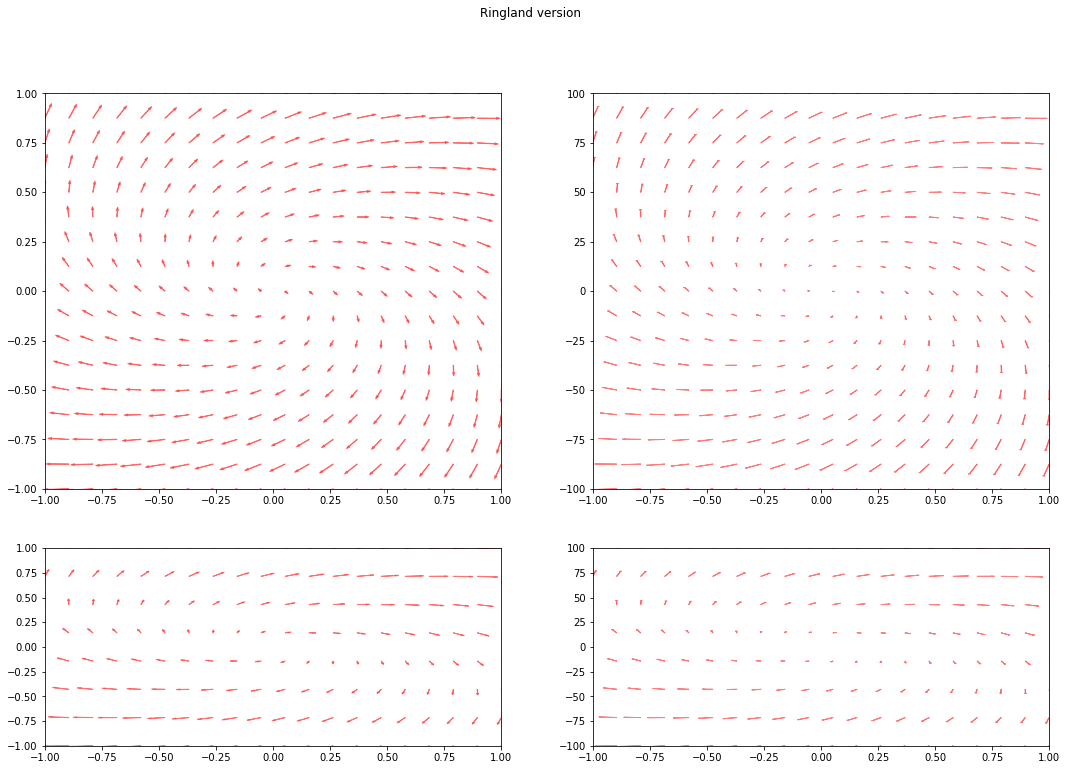

In [4]:
test(fieldplotlinear2019,'Ringland')

## Faran version

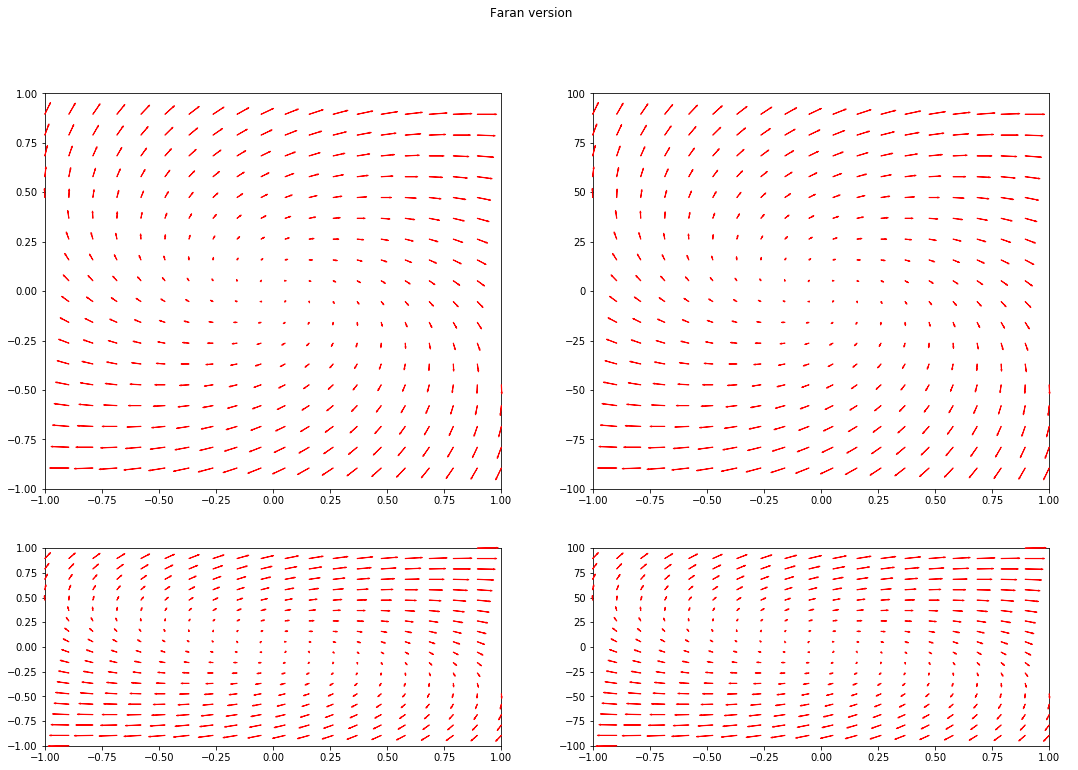

In [5]:
test(fieldplotlinear,'Faran')

How to draw, say, an equilateral triangle of a specified screen-size and data-space orientation at a specified data-space point?

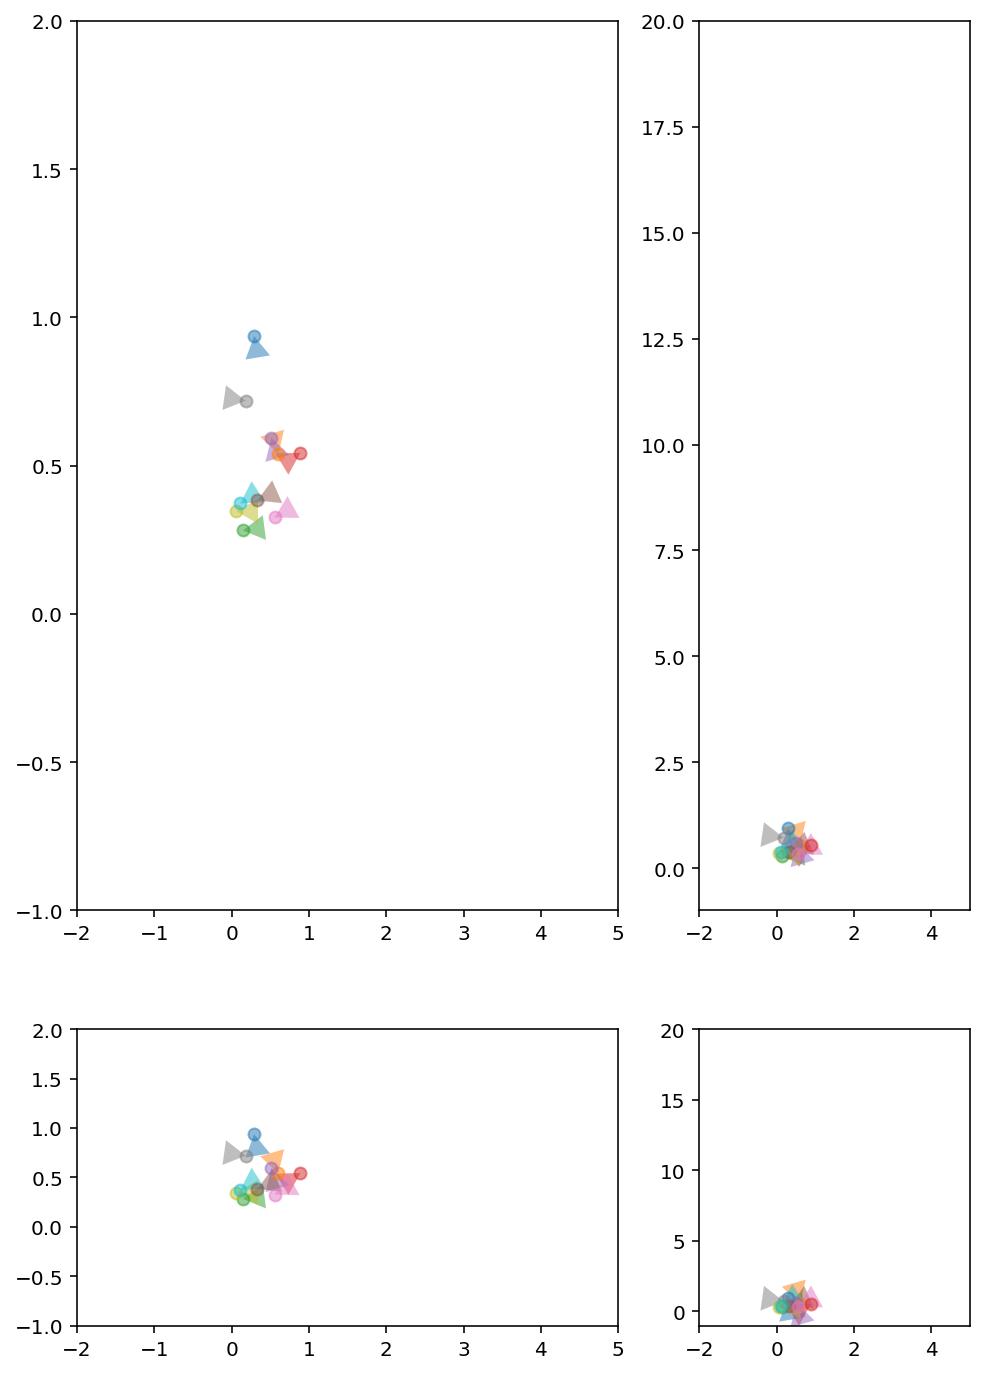

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'  # linux only
def get_aspect(ax=None):
    if ax is None:
        ax = plt.gca()
    fig = ax.figure
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    datawidth  = xlim[1]-xlim[0]
    dataheight = ylim[1]-ylim[0]
    ll, ur = ax.get_position() * fig.get_size_inches()
    width_inches, height_inches = ur - ll
    axes_ratio = height_inches / width_inches
    aspect = axes_ratio / ax.get_data_ratio()
    return aspect,width_inches,height_inches,datawidth,dataheight

def draw_triangle( ax, dataxy, datavxvy, screensize ):
    sqrt3o2 = 0.8660254037844387
    arrowhead = np.array([[0,0],[-1.5,sqrt3o2],[-1.5,-sqrt3o2]]).T # untransformed arrowhead
    asp,w,h,dw,dh = get_aspect(ax)
    #print(1/asp,w,h,dw,dh)
    angle = 2*np.pi*np.random.rand()
    c,s = np.cos(angle),np.sin(angle)
    rotated_arrowhead = np.array([[c,-s],[s,c]])@arrowhead
    #print(rotated_arrowhead)
    scaled_rotated_arrowhead = dw*screensize/w*(rotated_arrowhead.T *[1,1/asp]).T
    shifted_scaled_rotated_arrowhead = (dataxy + scaled_rotated_arrowhead.T).T
    ax.fill(shifted_scaled_rotated_arrowhead[0,:],shifted_scaled_rotated_arrowhead[1,:],alpha=0.5)
    ax.plot(shifted_scaled_rotated_arrowhead[0,0],shifted_scaled_rotated_arrowhead[1,0],'o',alpha=0.5)
#plt.figure(figsize=(13,3))
def test(ax):
    for k in range(10):
        draw_triangle( ax, np.random.rand(2),[.4,.5],.1 )
    
fig,axes = plt.subplots(2,2,figsize=(8,12),gridspec_kw={'height_ratios': [3, 1],'width_ratios': [2, 1]})
axes[0,0].set_xlim(-2,5)    
axes[0,1].set_xlim(-2,5)    
axes[0,0].set_ylim(-1,2)    
axes[0,1].set_ylim(-1,20)    
axes[1,0].set_xlim(-2,5)    
axes[1,1].set_xlim(-2,5)    
axes[1,0].set_ylim(-1,2)    
axes[1,1].set_ylim(-1,20)    

np.random.seed(389)
test(axes[0,0])
np.random.seed(389)
test(axes[0,1])
np.random.seed(389)
test(axes[1,0])
np.random.seed(389)
test(axes[1,1])

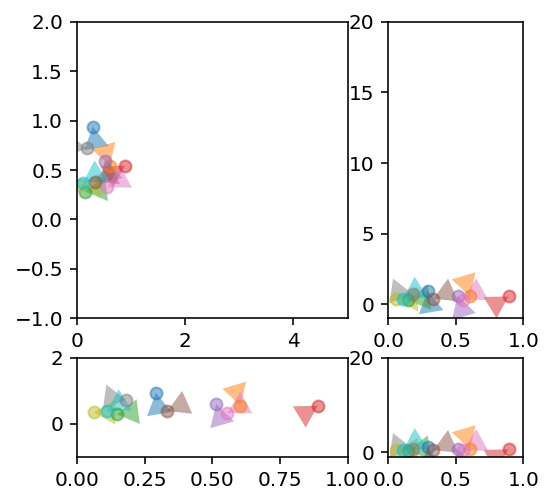

In [7]:
def test(ax):
    for k in range(10):
        draw_triangle( ax, np.random.rand(2),[.4,.5],.1 )
    
fig,axes = plt.subplots(2,2,figsize=(4,4),gridspec_kw={'height_ratios': [3, 1],'width_ratios': [2, 1]})
axes[0,0].set_xlim(0,5)    
axes[0,1].set_xlim(0,1)    
axes[0,0].set_ylim(-1,2)    
axes[0,1].set_ylim(-1,20)    
axes[1,0].set_xlim(0,1)    
axes[1,1].set_xlim(0,1)    
axes[1,0].set_ylim(-1,2)    
axes[1,1].set_ylim(-1,20)    

np.random.seed(389)
test(axes[0,0])
np.random.seed(389)
test(axes[0,1])
np.random.seed(389)
test(axes[1,0])
np.random.seed(389)
test(axes[1,1])

1/7/2020. Making progress. Triangles seem to have the same size, orientation, and unit aspect on the screen regardless of plot size or data ranges. 

Remains to calculate what orientation they should be at from the velocity vector, and decide on the design of the arrow.
A line segment and a triangle drawn on top? Easy but not pretty. Maybe another (skinnier) triangle based at its *tail* rather than its tip.

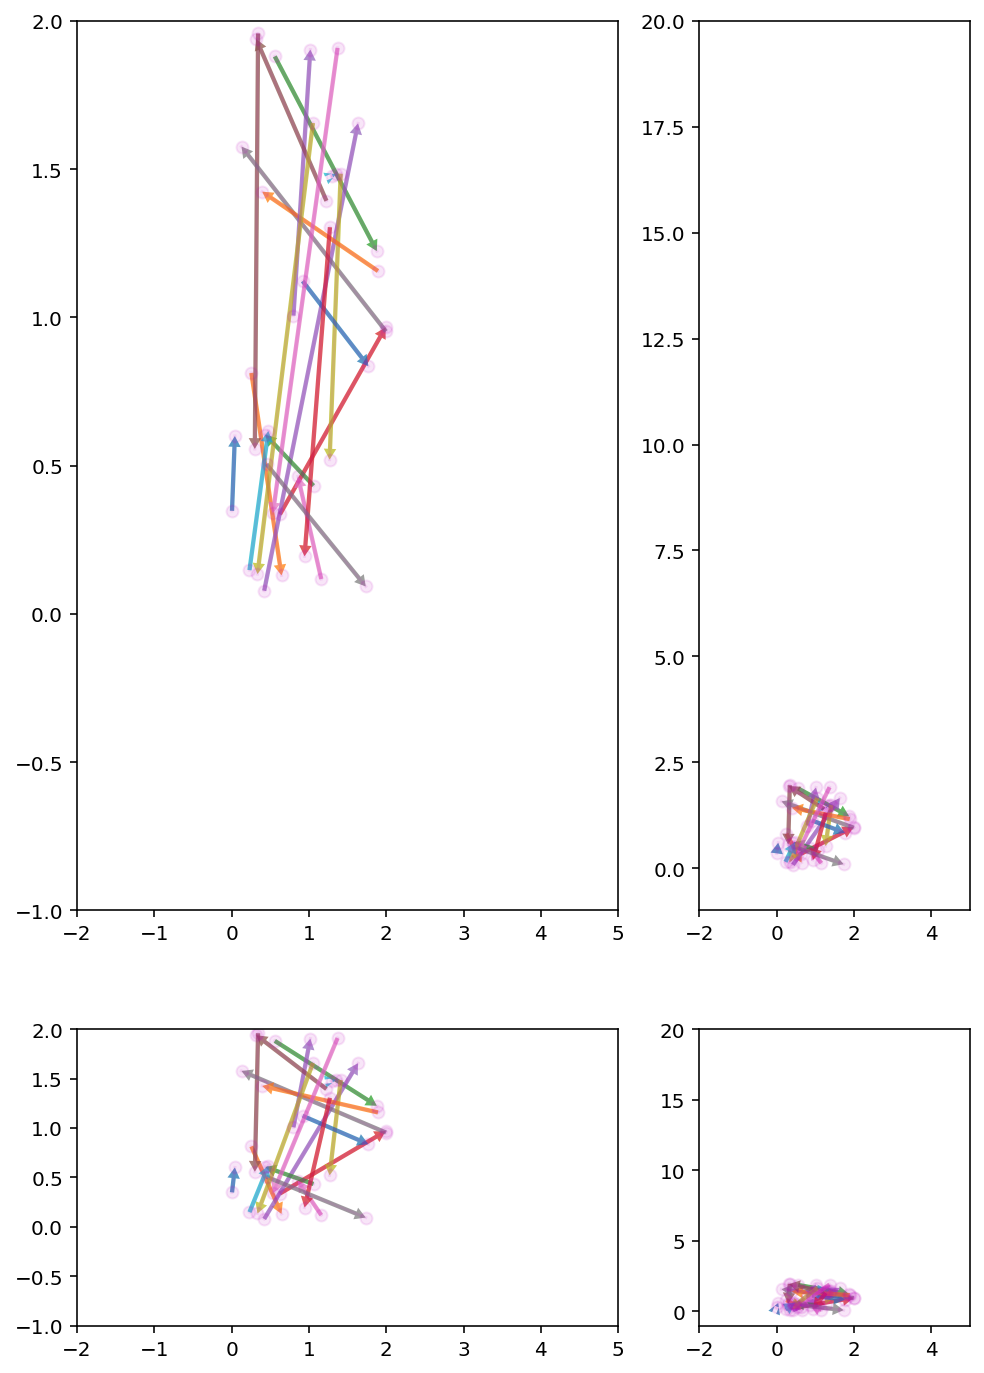

In [77]:
fig,axes = plt.subplots(2,2,figsize=(8,12),gridspec_kw={'height_ratios': [3, 1],'width_ratios': [2, 1]})
axes[0,0].set_xlim(-2,5)    
axes[0,1].set_xlim(-2,5)    
axes[0,0].set_ylim(-1,2)    
axes[0,1].set_ylim(-1,20)    
axes[1,0].set_xlim(-2,5)    
axes[1,1].set_xlim(-2,5)    
axes[1,0].set_ylim(-1,2)    
axes[1,1].set_ylim(-1,20) 
sqrt3o2 = 0.8660254037844387
arrowshaft_width = .3
arrow_size = .05
arrowhead_inches = arrow_size*np.array([[0,0],\
                                [-1.5,sqrt3o2],[-1.5,arrowshaft_width],\
                                [-3.5,arrowshaft_width], [-3.5,-arrowshaft_width],\
                                [-1.5,-arrowshaft_width],[-1.5,-sqrt3o2]]) # untransformed arrowhead
for k in range(20):
    data_base = 2*np.random.rand(2)
    data_tip  = 2*np.random.rand(2)

    for i in range(2):
        for j in range(2):
            ax = axes[i,j]
            ll, ur = ax.get_position() * fig.get_size_inches()
            width_inches, height_inches = ur - ll
            data_xlim = ax.get_xlim()
            data_ylim = ax.get_ylim()
            data_origin = np.array([data_xlim[0],data_ylim[0]])
            xrange = data_xlim[1]-data_xlim[0]
            yrange = data_ylim[1]-data_ylim[0]
            x_to_inches = width_inches/xrange
            y_to_inches = height_inches/yrange
            #print(i,j,x_to_inches,y_to_inches)
            tip_inches  = (data_tip  - data_origin) * [x_to_inches,y_to_inches]
            base_inches = (data_base - data_origin) * [x_to_inches,y_to_inches]
            arrow_length_inches = np.linalg.norm(tip_inches-base_inches)
            #print(arrow_length_inches)
            arrowhead_inches[3,0] = -arrow_length_inches #-max(arrow_size*1.5,arrow_length_inches)
            arrowhead_inches[4,0] = -arrow_length_inches #-max(arrow_size*1.5,arrow_length_inches)
            inches_angle = np.arctan2(tip_inches[1]-base_inches[1],tip_inches[0]-base_inches[0])
            c,s = np.cos(inches_angle),np.sin(inches_angle)
            polygon_inches = arrowhead_inches 
            rotated_arrowhead_inches = (np.array([[c,-s],[s,c]])@polygon_inches.T).T + tip_inches
            polygon_data = rotated_arrowhead_inches*[1/x_to_inches,1/y_to_inches] + data_origin
            ax.fill( polygon_data[:,0], polygon_data[:,1] ,alpha=0.75)
            ax.plot([data_base[0],data_tip[0]],[data_base[1],data_tip[1]],'m-o',alpha=0.1)


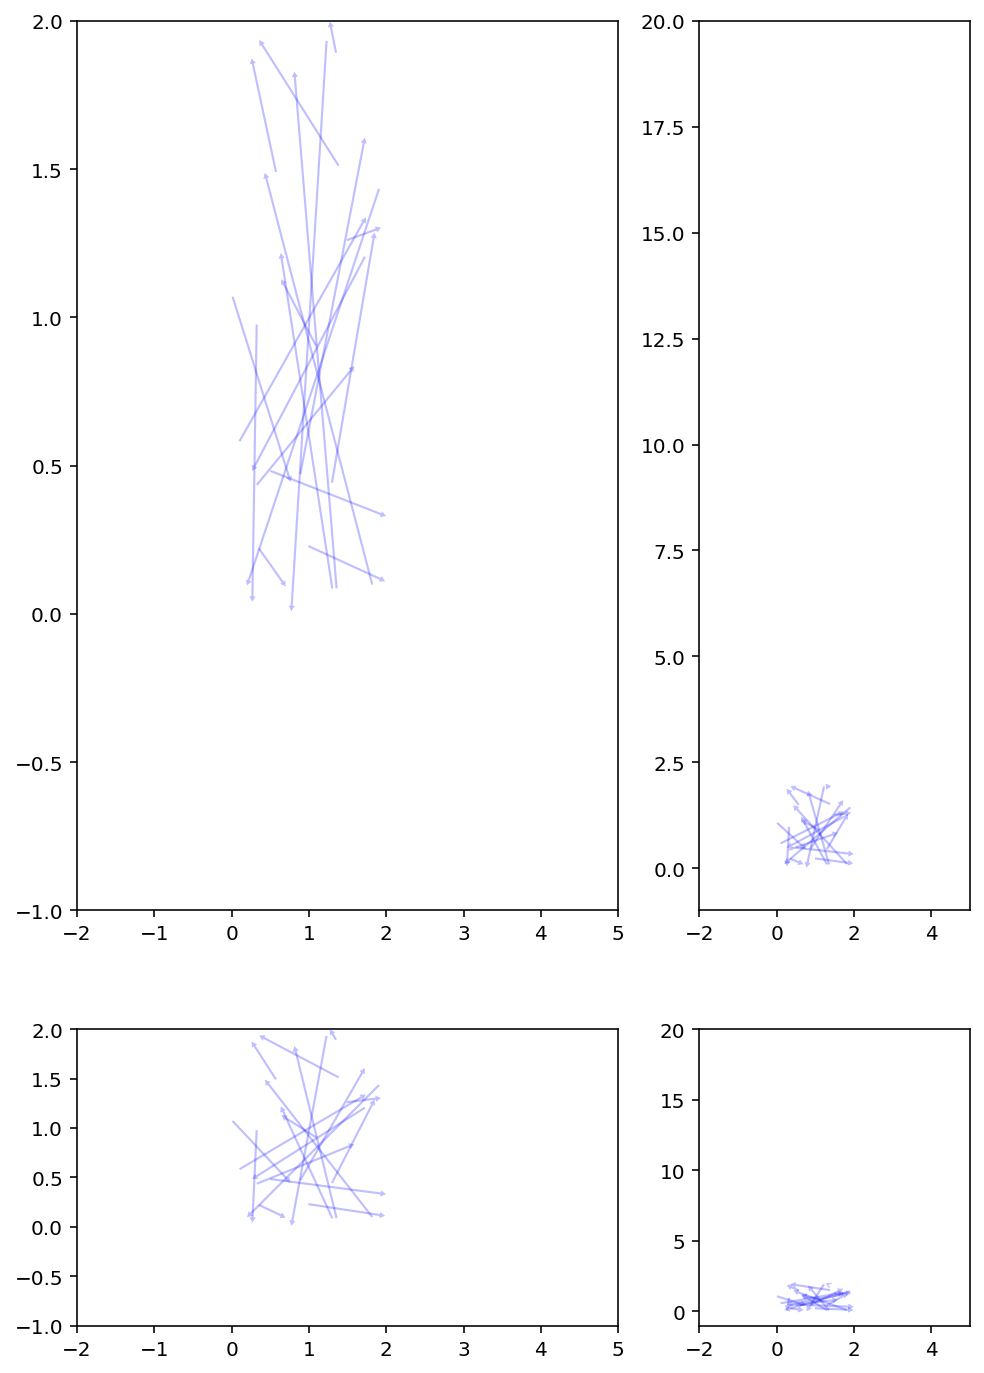

In [128]:
fig,axes = plt.subplots(2,2,figsize=(8,12),gridspec_kw={'height_ratios': [3, 1],'width_ratios': [2, 1]})
axes[0,0].set_xlim(-2,5)    
axes[0,1].set_xlim(-2,5)    
axes[0,0].set_ylim(-1,2)    
axes[0,1].set_ylim(-1,20)    
axes[1,0].set_xlim(-2,5)    
axes[1,1].set_xlim(-2,5)    
axes[1,0].set_ylim(-1,2)    
axes[1,1].set_ylim(-1,20) 

sqrt3o2 = 0.8660254037844387
arrowshaft_width = .3
arrow_size = .025
arrowhead_inches = arrow_size*np.array([[0,0],\
                                [-1.5,sqrt3o2],[-1.5,arrowshaft_width],\
                                [-3.5,arrowshaft_width], [-3.5,-arrowshaft_width],\
                                [-1.5,-arrowshaft_width],[-1.5,-sqrt3o2]]) # untransformed arrowhead

def draw_arrow(ax,data_base,data_tip,color='k',alpha=0.25):
    ll, ur = ax.get_position() * fig.get_size_inches()
    width_inches, height_inches = ur - ll
    data_xlim = ax.get_xlim()
    data_ylim = ax.get_ylim()
    data_origin = np.array([data_xlim[0],data_ylim[0]])
    xrange = data_xlim[1]-data_xlim[0]
    yrange = data_ylim[1]-data_ylim[0]
    x_to_inches = width_inches/xrange
    y_to_inches = height_inches/yrange
    #print(width_inches,height_inches,xrange,yrange,x_to_inches,y_to_inches)   # width and height are not always correct!!!!!!!!!!!!!!!!!!!!!!!!!
    tip_inches  = (data_tip  - data_origin) * [x_to_inches,y_to_inches]
    base_inches = (data_base - data_origin) * [x_to_inches,y_to_inches]
    arrow_length_inches = np.linalg.norm(tip_inches-base_inches)
    #print(arrow_length_inches)
    arrowhead_inches[3,0] = -arrow_length_inches #-max(arrow_size*1.5,arrow_length_inches)
    arrowhead_inches[4,0] = -arrow_length_inches #-max(arrow_size*1.5,arrow_length_inches)
    inches_angle = np.arctan2(tip_inches[1]-base_inches[1],tip_inches[0]-base_inches[0])
    c,s = np.cos(inches_angle),np.sin(inches_angle)
    polygon_inches = arrowhead_inches 
    rotated_arrowhead_inches = (np.array([[c,-s],[s,c]])@polygon_inches.T).T + tip_inches
    polygon_data = rotated_arrowhead_inches*[1/x_to_inches,1/y_to_inches] + data_origin
    ax.fill( polygon_data[:,0], polygon_data[:,1],linewidth=0,color=color,alpha=alpha)
    #ax.plot([data_base[0],data_tip[0]],[data_base[1],data_tip[1]],'m-o',alpha=0.1)

for k in range(20):
    data_base = 2*np.random.rand(2)
    data_tip  = 2*np.random.rand(2)
    for i in range(2):
        for j in range(2):
            draw_arrow( axes[i,j], data_base,data_tip, color='b' )


fieldplot2020 -1 1 -1 1 20


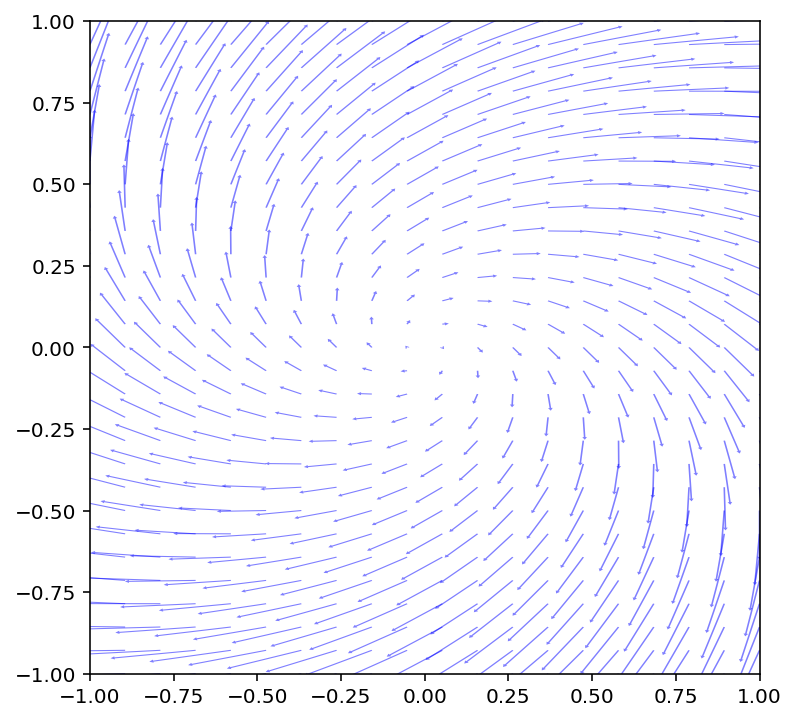

In [129]:
def fieldplot2020(F,xmin,xmax,ymin,ymax,color='b',ax=None,aspect=None,nx=20,boostarrows=1.,arrowheads=True,alpha=1):
    # version used in Fall 2019
    if ax is None:
        ax = plt.gca()
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    print('fieldplot2020',xmin,xmax,ymin,ymax,nx)
    def f(x,y): return F((x,y))[0]
    def g(x,y): return F((x,y))[1]
    # Doing it this way is unfortunately twice the work (2 calls to F for every evaluation)
    '''f and g are numpy-friendly functions of 2 variables'''
    #plt.clf()
    #figure(figsize=(12,12))
    #figure(figsize=(8,8),facecolor='w')
    #nx = 20
    xr = xmax-xmin
    yr = ymax-ymin
    #asp = ax.get_aspect()
    #print(asp)
    ll, ur = ax.get_position() * fig.get_size_inches()
    width_inches, height_inches = ur - ll
    ny = int(height_inches/width_inches*nx) #  not yet right #int( nx*asp )# changed 1/7/20 int(nx*yr/xr)
    #if aspect!=None:
    #    plt.subplot(111,aspect=aspect)
    X,Y = np.meshgrid( np.linspace(xmin,xmax,nx), np.linspace(ymin,ymax,ny) )
    X = X.flatten()
    Y = Y.flatten()
    U = f(X,Y)
    V = g(X,Y)
    h = .1
    '''
    #print(U)
    #print(V)
    # scale length of arrows - note arrowhead is added beyond the end of the line segment
    h = boostarrows*0.9*min(xr/float(nx-1)/abs(U).max(),yr/float(ny-1)/abs(V).max())
    Xp = X + h*U
    Yp = Y + h*V
    arrowsX = np.vstack((X,Xp))
    arrowsY = np.vstack((Y,Yp))
    if arrowheads:
       head_width  = 0.005*xr
    else:
       head_width  = 0
    head_length = head_width/0.6
    '''
    for xc,yc,u,v in zip(X,Y,U,V):
        draw_arrow(ax, [xc,yc], [xc+h*u,yc+h*v], color=color, alpha=alpha )
  
def fieldplotlinear2020(A,xmin,xmax,ymin,ymax,ax=None,color='b',aspect=None,nx=20,boostarrows=1.,arrowheads=True,alpha=1):
    def F(X): 
        return np.dot(A,X)
    fieldplot2020(F,xmin,xmax,ymin,ymax,ax=ax,color=color,aspect=aspect,nx=nx,boostarrows=boostarrows,arrowheads=arrowheads,alpha=alpha)

A = [[1,2],[-1,1]] 
plt.figure(figsize=(6,6))
plt.subplot(111)
fieldplotlinear2020(A, -1,1, -1,1, plt.gca(), color='blue', alpha=0.5)

fieldplot2020 -1 1 -1 1 20
fieldplot2020 -1 1 -1 1 20
fieldplot2020 -1 1 -100 100 20
fieldplot2020 -1 1 -100 100 20


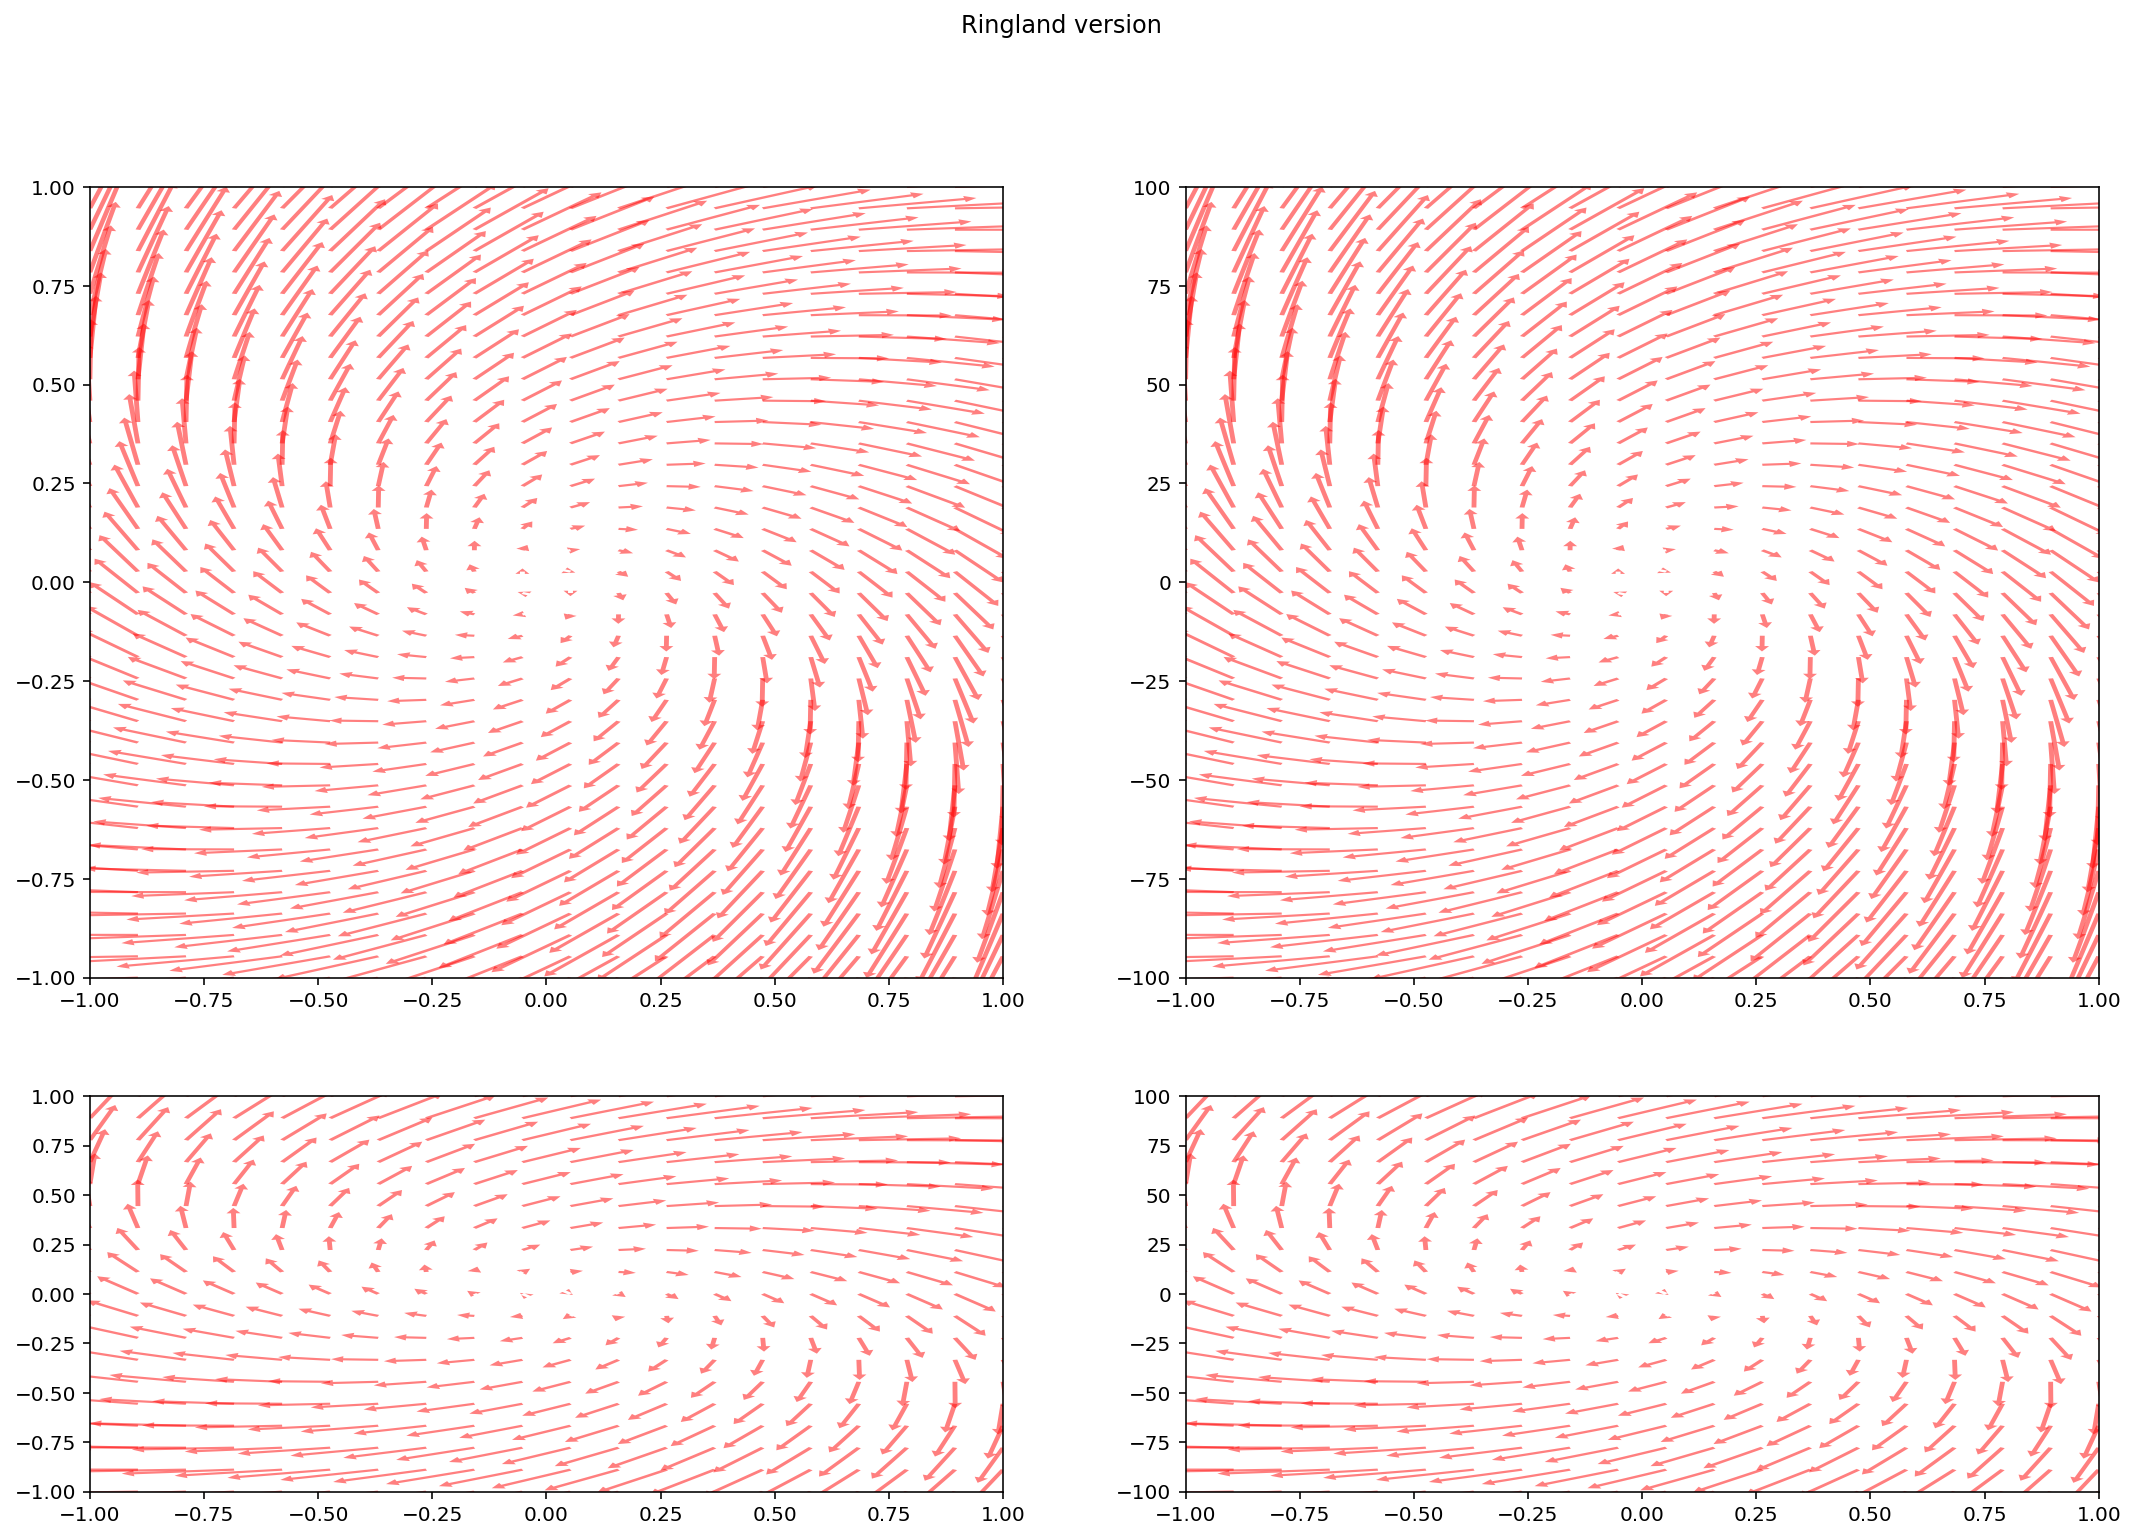

In [130]:
def test(fpl,version):
    fig,axes = plt.subplots(2,2,figsize=(18,12),gridspec_kw={'height_ratios': [2, 1]})
    A0 = [[1,2],[-1,1]]
    
    # balanced coordinates
    rescale = 1
    P = np.array([[1,0],[0,1/rescale]])
    A = np.linalg.inv(P)@np.array(A0)@P
    plt.sca(axes[0,0])  # square plot
    fpl(A, -1,1, -rescale,rescale, color='red', alpha=0.5)
    plt.sca(axes[1,0])  # non-square plot
    fpl(A, -1,1, -rescale,rescale, color='red', alpha=0.5)

    # stretched coordinates
    rescale = 100
    P = np.array([[1,0],[0,1/rescale]])
    A = np.linalg.inv(P)@np.array(A0)@P
    plt.sca(axes[0,1])  # square plot
    fpl(A, -1,1, -rescale,rescale, color='red', alpha=0.5)
    plt.sca(axes[1,1])  # non-square plot
    fpl(A, -1,1, -rescale,rescale, color='red', alpha=0.5)   
    plt.suptitle(version + ' version')
    plt.savefig('fp_test_'+version+'.svg',bbox_inches='tight')
    
test(fieldplotlinear2020,'Ringland')